<a href="https://colab.research.google.com/github/avahuu/dc_bikesharing/blob/main/bikesharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from pathlib import Path

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, Latex, Markdown

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
bike = pd.read_csv('/content/drive/MyDrive/github/bicycle/bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# Data Preparation
# Modify holiday, weekday, workingday, and weathersit here.

bike['holiday'] = bike['holiday'].replace({0: 'no', 1: 'yes'})

bike['weekday'] = bike['weekday'].replace({
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'
})

bike['workingday'] = bike['workingday'].replace({0: 'no', 1: 'yes'})

bike['weathersit'] = bike['weathersit'].replace({
    1: 'Clear',
    2: 'Mist',
    3: 'Light',
    4: 'Heavy'
})

bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
daily_counts = (
    bike.groupby('dteday')[['casual', 'registered']].sum()
    .join(bike[['dteday', 'workingday']].drop_duplicates().set_index('dteday'))
)

daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


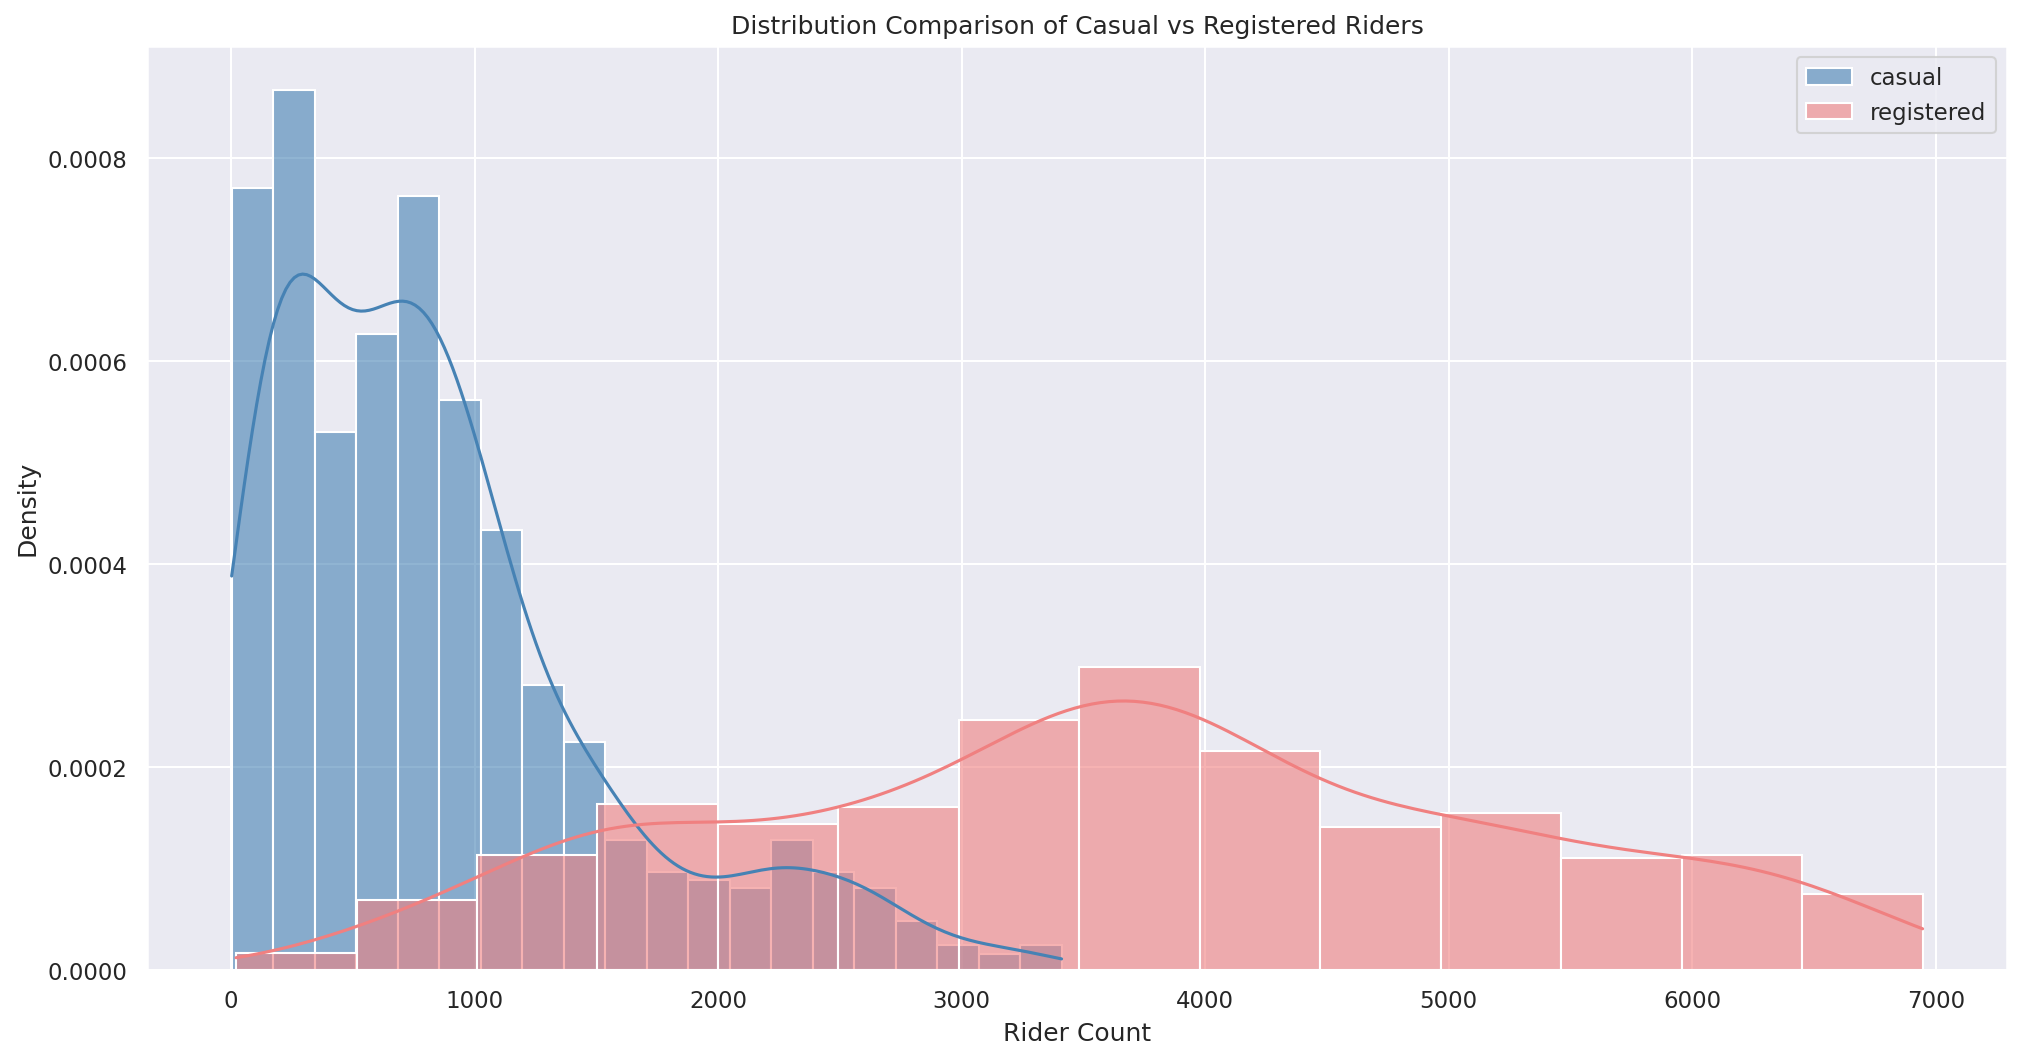

In [9]:
# Matplotlib
sns.histplot(data=daily_counts, x='casual', color='steelblue', label='casual',
             stat='density', kde=True, alpha=0.6)
sns.histplot(data=daily_counts, x='registered', color='lightcoral', label='registered',
             stat='density', kde=True, alpha=0.6)

# Labels and title
plt.xlabel('Rider Count')
plt.ylabel('Density')
plt.title('Distribution Comparison of Casual vs Registered Riders')
plt.legend()
plt.show()